Name: Georgy Andryushchenko  
Email: g.andryushchenko@innopolis.university  
Group: B19-DS-01

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 3 Practical Tasks on Ensemble Learning

## 1. Read data in Python. Split your data into train and test sets (80% and 20% respectively).

In [ ]:
# read the dataframe
df = pd.read_csv('android_traffic.csv')

input_features = df.columns[0:11]
output_feature = df.columns[11]

# separate the dataframe into X and y
X = df[input_features]
y = df[output_feature]

In [ ]:
from sklearn.model_selection import train_test_split

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 2. Create the following three models:

### `RandomForestClassifier(max_depth=15)`

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_clf = RandomForestClassifier(max_depth=15)

### `BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15))`

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15))

### `AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15))`

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adaboost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15))

## 3. Tune the following hyper-parameters of the estimators in all ensemble models using grid search:  
• n estimators  
• max features -> for the base estimators  
• min impurity decrease -> for the base estimators  
  
You should tune these hyper-parameters within the ensemble not separately. Create the final models
using the best values of the hyper-parameters and evaluate your models on the test set. Which model
performed the best on the test set? Why do you think that is the case?

In [ ]:
from sklearn.model_selection import GridSearchCV

### Tuning hyperparameters

#### Tuning hyperparameters for `random_forest_clf`

In [ ]:
# initialize the grid of parameters 
rf_parameters = [
    {
        'n_estimators': [30, 40, 50, 60, 70],
        'max_features': ["sqrt", "log2"],
        'min_impurity_decrease': np.logspace(-6, -9, 13)
    }
]

# create the grid search object
rf_grid_search = GridSearchCV(
    random_forest_clf,
    rf_parameters
)

# train the models, cross validate and get the best parameters
rf_grid_search.fit(X_train, y_train)
# print the best parameters
rf_grid_search.best_params_

{'max_features': 'log2', 'min_impurity_decrease': 1e-07, 'n_estimators': 70}

#### Tuning hyperparameters for `bagging_clf`

In [ ]:
# compose a set of base estimators 
# with different max_features and min_impurity_decrease
base_estimators = list()
for current_max_features in ["sqrt", "log2"]:
    for current_min_impurity_decrease in np.logspace(-6, -9, 13):
        base_estimators.append(
            DecisionTreeClassifier(
                max_depth=15,
                max_features=current_max_features,
                min_impurity_decrease=current_min_impurity_decrease
            )
        )

# initialize the grid of parameters 
bagging_parameters = [
    {
        'n_estimators': [30, 40, 50, 60, 70], 
        'base_estimator': base_estimators
    }
]

# create the grid search object
bagging_grid_search = GridSearchCV(
    bagging_clf,
    bagging_parameters
)

# train the models, cross validate and get the best parameters
bagging_grid_search.fit(X_train, y_train)
# print the best parameters
bagging_grid_search.best_params_

{'base_estimator': DecisionTreeClassifier(max_depth=15, max_features='sqrt',
                        min_impurity_decrease=5.623413251903491e-09),
 'n_estimators': 40}

#### Tuning hyperparameters for `adaboost_clf`

In [ ]:
# compose a set of base estimators 
# with different max_features and min_impurity_decrease
base_estimators = list()
for current_max_features in ["sqrt", "log2"]:
    for current_min_impurity_decrease in np.logspace(-6, -9, 13):
        base_estimators.append(
            DecisionTreeClassifier(
                max_depth=15,
                max_features=current_max_features,
                min_impurity_decrease=current_min_impurity_decrease
            )
        )

# initialize the grid of parameters 
adaboost_parameters = [
    {
        'n_estimators': [30, 40, 50, 60, 70], 
        'base_estimator': base_estimators
    }
]

# create the grid search object
adaboost_grid_search = GridSearchCV(
    adaboost_clf,
    adaboost_parameters
)

# train the models, cross validate and get the best parameters
adaboost_grid_search.fit(X_train, y_train)
# print the best parameters
adaboost_grid_search.best_params_

{'base_estimator': DecisionTreeClassifier(max_depth=15, max_features='sqrt',
                        min_impurity_decrease=1e-09), 'n_estimators': 70}

### Testing models

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

#### Testing `random_forest_clf` 

In [ ]:
# initialize the random forest model with the best parameters
random_forest_clf = RandomForestClassifier(
    max_depth=15,
    max_features=rf_grid_search.best_params_['max_features'],
    min_impurity_decrease=rf_grid_search.best_params_['min_impurity_decrease'],
    n_estimators=rf_grid_search.best_params_['n_estimators']
)
# train the model
random_forest_clf.fit(X_train, y_train)

# print the testing accuracy and F1 score
print("accuracy:", accuracy_score(y_test, random_forest_clf.predict(X_test)))
print("f1 score:", f1_score(y_test, random_forest_clf.predict(X_test), pos_label='malicious'))

accuracy: 0.9012109623964308
f1 score: 0.8759007205764612


#### Testing `bagging_clf` 

In [ ]:
# initialize the bagging model with the best parameters 
bagging_clf = BaggingClassifier(
    n_estimators=bagging_grid_search.best_params_['n_estimators'],
    base_estimator=bagging_grid_search.best_params_['base_estimator']
)
# train the model
bagging_clf.fit(X_train, y_train)

# print the testing accuracy and F1 score
print("accuracy:", accuracy_score(y_test, bagging_clf.predict(X_test)))
print("f1 score:", f1_score(y_test, bagging_clf.predict(X_test), pos_label='malicious'))

accuracy: 0.9005736137667304
f1 score: 0.8752


#### Testing `adaboost_clf` 

In [ ]:
# initialize the model with the best parameters
adaboost_clf = AdaBoostClassifier(
    n_estimators=adaboost_grid_search.best_params_['n_estimators'],
    base_estimator=adaboost_grid_search.best_params_['base_estimator']
)
# train the model
adaboost_clf.fit(X_train, y_train)

# print the testing accuracy and F1 score
print("accuracy:", accuracy_score(y_test, adaboost_clf.predict(X_test)))
print("f1 score:", f1_score(y_test, adaboost_clf.predict(X_test), pos_label='malicious'))

accuracy: 0.8833652007648184
f1 score: 0.8569194683346365


Random Forest Classifier and Bagging Classifier completed the tests with nearly the same performance: their accuracy and F1 score differ insignificantly. However, AdaBoost Classifier demonstrated the lower values. Thus, we can say that both Random Forest and Bagging classifiers are appropriate to be the best models for us since basically there is no difference between them in our case.

## 4. Answer this question before doing the next part. If you fine-tuned the hyper-parameter max depth as well, which of the three ensemble models would you expect to have deeper (larger max depth value) base learners and which would have shallower base learners? Why do you think that would be the case?

AdaBoost classifier applies weak learners to generate the final output. If we use decision trees as the base estimators then weak decision trees should have small depth. Therefore, it makes sense to expect shallower base learner in AdaBoost unlike the other classifiers. Random forest and Bagging classifiers are going to be of nearly the same depth since they are conceptually the same in our case.

## 5. Initialize the models with the best parameters you got from the third step. Fine tune max depth from 5 to 25. Draw 3 plots on the same graph. Put the max depth parameter on the horizontal axis and the cross validation accuracy of your ensemble models on the vertical axis. Do the results agree with your answer in the previous part?

In [ ]:
from sklearn.model_selection import cross_val_score

### Tuning `max_depth` for the models

#### Tuning `max_depth` for Random Forest

In [ ]:
# initialize the grid of parameters
rf_max_depth_parameters = [
    {
        'max_depth': range(5,26)
    }
]

# create the grid search object
rf_max_depth_grid_search = GridSearchCV(
    random_forest_clf,
    rf_max_depth_parameters
)

# train the models, cross validate and get the best parameters
rf_max_depth_grid_search.fit(X_train, y_train)
# print the best parameters
print(rf_max_depth_grid_search.best_params_)

{'max_depth': 18}


#### Tuning `max_depth` for Bagging

In [ ]:
# obtain the list of base estimators with different max_depth
max_depth_bagging_base_estimators = list()

for current_max_depth in range(5,26):
    max_depth_bagging_base_estimators.append(
        DecisionTreeClassifier(
            max_depth=current_max_depth,
            max_features=bagging_grid_search.best_params_['base_estimator'].get_params()['max_features'],
            min_impurity_decrease=bagging_grid_search.best_params_['base_estimator'].get_params()['min_impurity_decrease']
        )
    )

# initialize the grid of parameters
bagging_max_depth_parameters = [
    {
        'base_estimator': max_depth_bagging_base_estimators
    }
]

# create the grid search object
bagging_max_depth_grid_search = GridSearchCV(
    bagging_clf,
    bagging_max_depth_parameters
)

# train the models, cross validate and get the best parameters
bagging_max_depth_grid_search.fit(X_train, y_train)
# print the best parameters
print(bagging_max_depth_grid_search.best_params_)

{'base_estimator': DecisionTreeClassifier(max_depth=24, max_features='sqrt',
                       min_impurity_decrease=5.623413251903491e-09)}


#### Tuning `max_depth` for AdaBoost

In [ ]:
# obtain the list of base estimators with different max_depth
max_depth_adaboost_base_estimators = list()

for current_max_depth in range(5,26):
    max_depth_adaboost_base_estimators.append(
        DecisionTreeClassifier(
            max_depth=current_max_depth,
            max_features=adaboost_grid_search.best_params_['base_estimator'].get_params()['max_features'],
            min_impurity_decrease=adaboost_grid_search.best_params_['base_estimator'].get_params()['min_impurity_decrease']
        )
    )

# initialize the grid of parameters
adaboost_max_depth_parameters = [
    {
        'base_estimator': max_depth_adaboost_base_estimators
    }
]

# create the grid search object
adaboost_max_depth_grid_search = GridSearchCV(
    adaboost_clf,
    adaboost_max_depth_parameters
)

# train the models, cross validate and get the best parameters
adaboost_max_depth_grid_search.fit(X_train, y_train)
# print the best parameters
print(adaboost_max_depth_grid_search.best_params_)

{'base_estimator': DecisionTreeClassifier(max_depth=8, max_features='sqrt',
                       min_impurity_decrease=1e-09)}


### Cross validation accuracy at different `max_depth`

#### Getting CV accuracy for random forest classifier

In [ ]:
rf_cv_accuracy = list()

for current_max_depth in range(5,26):

    # initialize the model with the current max_depth and best params
    random_forest_clf = RandomForestClassifier(
        max_depth=current_max_depth,
        max_features=rf_grid_search.best_params_['max_features'],
        min_impurity_decrease=rf_grid_search.best_params_['min_impurity_decrease'],
        n_estimators=rf_grid_search.best_params_['n_estimators']
    )
    # train the model
    random_forest_clf.fit(X_train, y_train)

    # get the cross validation accuracy and add it if the list
    rf_cv_accuracy.append(cross_val_score(random_forest_clf, X_test, y_test).mean())

print(rf_cv_accuracy)

[0.7584298243828982, 0.7800940151808063, 0.7960277568629047, 0.801760240939338, 0.817057039946277, 0.8285342178628845, 0.8329948515496225, 0.8361754950041718, 0.8406381636515334, 0.8457398099346778, 0.8432022140371584, 0.8432022140371584, 0.8470198001668668, 0.8489346981135915, 0.8514865387354755, 0.8483058952809264, 0.8514906086567227, 0.8438391567123176, 0.8521214464500112, 0.8438330518304472, 0.8495797806312447]


#### Getting CV accuracy for bagging classifier

In [ ]:
bagging_cv_accuracy = list()

for current_max_depth in range(5,26):

    # initialize the model with the current max_depth and best params
    bagging_clf = BaggingClassifier(
        n_estimators=bagging_grid_search.best_params_['n_estimators'],
        base_estimator=DecisionTreeClassifier(
            max_depth=current_max_depth,
            max_features=bagging_grid_search.best_params_['base_estimator'].get_params()['max_features'],
            min_impurity_decrease=bagging_grid_search.best_params_['base_estimator'].get_params()['min_impurity_decrease']
        )
    )

    # train the model
    bagging_clf.fit(X_train, y_train)

    # get the cross validation accuracy and add it if the list
    bagging_cv_accuracy.append(cross_val_score(bagging_clf, X_test, y_test).mean())

print(bagging_cv_accuracy)

[0.762888423109013, 0.7775482794407929, 0.7953948841089925, 0.8081317026515537, 0.8157831545959586, 0.8202458232433202, 0.8298040332919557, 0.8310880934453918, 0.8368226124824485, 0.841924258765593, 0.8438310168698238, 0.8412934209723042, 0.8425591664801286, 0.8406503734152745, 0.847660812763273, 0.8521255163712581, 0.8476608127632732, 0.8476689526057672, 0.8444862741905945, 0.8406544433365214, 0.8508495960603162]


#### Getting CV accuracy for AdaBoost classifier

In [ ]:
adaboost_cv_accuracy = list()

for current_max_depth in range(5,26):

    # initialize the model with the current max_depth and best params
    adaboost_clf = AdaBoostClassifier(
        n_estimators=adaboost_grid_search.best_params_['n_estimators'],
        base_estimator=DecisionTreeClassifier(
            max_depth=current_max_depth,
            max_features=adaboost_grid_search.best_params_['base_estimator'].get_params()['max_features'],
            min_impurity_decrease=adaboost_grid_search.best_params_['base_estimator'].get_params()['min_impurity_decrease']
        )
    )

    # train the model
    adaboost_clf.fit(X_train, y_train)

    # get the cross validation accuracy and add it if the list
    adaboost_cv_accuracy.append(cross_val_score(adaboost_clf, X_test, y_test).mean())

print(adaboost_cv_accuracy)

[0.8329989214708695, 0.8253576443295823, 0.8266417044830183, 0.8291691255774201, 0.8234529211859751, 0.8177184021489184, 0.8291894751836553, 0.8024236381026026, 0.8260149366109767, 0.8317270710811746, 0.8119818481512382, 0.8189760078142487, 0.8228220833926864, 0.8170773895525121, 0.8145296188518752, 0.8138987810585865, 0.8068781669074705, 0.8049632689607457, 0.8196292301743962, 0.8068740969862234, 0.8049653039213691]


#### Plot

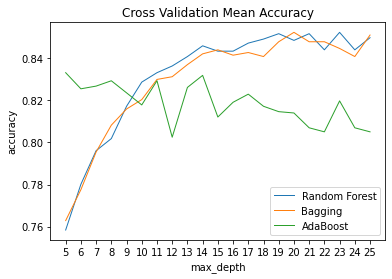

In [ ]:
plt.xticks(range(21), range(5,26)) # set the ticks on the X axis with unit 1
plt.plot(rf_cv_accuracy, linewidth=1, label='Random Forest')
plt.plot(bagging_cv_accuracy, linewidth=1, label='Bagging')
plt.plot(adaboost_cv_accuracy, linewidth=1, label='AdaBoost')
plt.title('Cross Validation Mean Accuracy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

The results of `max_depth` fine tuning are consistent with the answer given in the previous part. Random Forest and Bagging have the best accuracy if they have larger maximal depth while AdaBoost performs better when it has smaller `max_depth`. 

# 4 Practical Tasks on CNN

## Preprocess and visualize the dataset:

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
import os

### Download dataset. Description of folders and naming are inside dataset folder in README.txt

In [2]:
!wget https://www2.unavarra.es/gesadj/GI4E/gi4e_database.zip
!unzip gi4e_database.zip

--2021-11-20 15:42:18--  https://www2.unavarra.es/gesadj/GI4E/gi4e_database.zip
Resolving www2.unavarra.es (www2.unavarra.es)... 130.206.159.250
Connecting to www2.unavarra.es (www2.unavarra.es)|130.206.159.250|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 836022238 (797M) [application/zip]
Saving to: ‘gi4e_database.zip’

gi4e_database.zip   100%[===================>] 797.29M  10.5MB/s    in 79s     

2021-11-20 15:43:39 (10.1 MB/s) - ‘gi4e_database.zip’ saved [836022238/836022238]

Archive:  gi4e_database.zip
   creating: images/
  inflating: images/001_01.png       
  inflating: images/001_02.png       
  inflating: images/001_03.png       
  inflating: images/001_04.png       
  inflating: images/001_05.png       
  inflating: images/001_06.png       
  inflating: images/001_07.png       
  inflating: images/001_08.png       
  inflating: images/001_09.png       
  inflating: images/001_10.png       
  inflating: images/001_11.png       
  inflating: imag

### Read all images and convert them to gray with (cv2.ctvColor())

In [3]:
# directory with the images
dir = './images/'

images = list()

for filename in sorted(os.listdir(dir)):

    # skip all files without .png extension
    if not filename.endswith('.png'):
        continue
    
    # read the image in the directory
    image = cv2.imread(dir + filename)
    # make the image grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # add the image to the list
    images.append(gray_image)

# convert the list of images into np array
images = np.array(images)

### Read annotation for images. It contains eye corners and eye centers of 2 eyes for each image.

In [4]:
# creating the Eye class for better
# manipulation of the Eye data  
class Eye:
    def __init__(
        self,
        internal_corner: np.array,
        external_corner: np.array,
        iris_center: np.array
    ):
        self.internal_corner = internal_corner
        self.external_corner = external_corner
        self.iris_center = iris_center

    # for debugging purposes
    def __str__(self):
        return f'Eye(internal_corner={self.internal_corner}, external_corner={self.external_corner}, iris_center={self.iris_center})'

# creating the Label class for better
# manipulation of the data about 
# the left and right eyes that the label contain
class Label:
    def __init__(self, left_eye: Eye, right_eye:Eye):
        self.left_eye = left_eye
        self.right_eye = right_eye
    
    # for debugging purposes
    def __str__(self):
        return f'Label(\n\tleft_eye={self.left_eye}\n\tright_eye={self.right_eye}\n)'

In [5]:
# the name of the file with labels
labels_filename = './labels/image_labels.txt'

labels = list()

# open the file with labels
with open(labels_filename) as labels_file:

    # read labels line by line
    for line in labels_file.readlines():
        
        # split the read line
        split_line = line.split()
        
        # the first item in the line is the name
        # of the corresponding image
        image_name = split_line[0]

        # convert the other items to float
        # since they are coordinates
        coords = list(map(float, split_line[1:]))

        # obtain the points for the left eye and save
        left_eye = Eye(
            external_corner=np.array([coords[0], coords[1]]),
            iris_center=np.array([coords[2], coords[3]]),
            internal_corner=np.array([coords[4], coords[5]])
        )

        # obtain the points for the right eye and save
        right_eye = Eye(
            internal_corner=np.array([coords[6], coords[7]]),
            iris_center=np.array([coords[8], coords[9]]),
            external_corner=np.array([coords[10], coords[11]])
        )

        # compose the label and save to the list
        labels.append(Label(left_eye, right_eye))

# convert the list of labels to np array
lables = np.array(labels)

### Visualize one image, draw eye corners and iris centers on it

[[254 254 254 ...  90  86  75]
 [254 254 254 ...  74  71  70]
 [254 254 254 ...  71  71  71]
 ...
 [113 121 126 ... 208 207 210]
 [115 118 119 ... 208 208 208]
 [113 114 112 ... 209 208 210]]


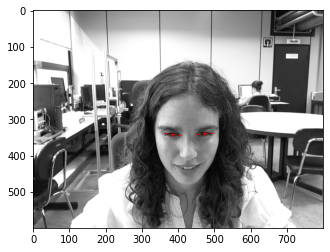

In [6]:
# get the image for demonstration
demo_image = images[0]
# get the label for demonstration
demo_label = labels[0]

# show the image
plt.imshow(demo_image, cmap='gray')

# get the X coordinates of the label
demo_label_x_list = [
    demo_label.left_eye.internal_corner[0],
    demo_label.left_eye.external_corner[0],
    demo_label.left_eye.iris_center[0],
    demo_label.right_eye.internal_corner[0],
    demo_label.right_eye.external_corner[0],
    demo_label.right_eye.iris_center[0]
]

# get the Y coordinates of the label
demo_label_y_list = [
    demo_label.left_eye.internal_corner[1],
    demo_label.left_eye.external_corner[1],
    demo_label.left_eye.iris_center[1],
    demo_label.right_eye.internal_corner[1],
    demo_label.right_eye.external_corner[1],
    demo_label.right_eye.iris_center[1]
]

# get some inside about the current values of the image
print(demo_image)

# plot the label
plt.plot(
    demo_label_x_list,
    demo_label_y_list,
    '+',
    markersize=3,
    color='red'
)

### Normalize images (divide by 255)

In [7]:
# perform normalization
images = images / 255 

[[0.99607843 0.99607843 0.99607843 ... 0.35294118 0.3372549  0.29411765]
 [0.99607843 0.99607843 0.99607843 ... 0.29019608 0.27843137 0.2745098 ]
 [0.99607843 0.99607843 0.99607843 ... 0.27843137 0.27843137 0.27843137]
 ...
 [0.44313725 0.4745098  0.49411765 ... 0.81568627 0.81176471 0.82352941]
 [0.45098039 0.4627451  0.46666667 ... 0.81568627 0.81568627 0.81568627]
 [0.44313725 0.44705882 0.43921569 ... 0.81960784 0.81568627 0.82352941]]


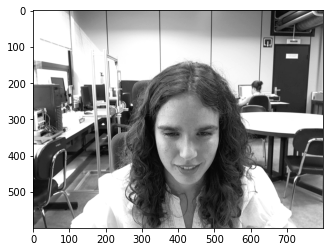

In [8]:
# check if the normaliztion has been done correctly
print(images[0])
# plot the image to check if it's ok
plt.imshow(images[0], cmap='gray')

### Crop eye regions (and resize if needed) to be (48x48) image with the help of eye corners. Do that for all images. It should look like Figure3(a)
### Now data is ready to create a final dataset, which you will use for CNN training. You should create two np arrays X and Y:
- X contains (48x48) images of eye regions which you crop on previous step
- Your labels (Y) are coordinates of eye center for each image in X (don’t forget to convert iris
center from whole image coordinate system to coordinate system of eye region). You should make
one more step to cook Y set. For each eye center in Y you should create a (48x48) image (with
zero values) and assign value=1 to pixel which coordinate is an iris center. Do it for all images.
It should look like Figure3(b)

Finally, your X and Y sets are lists of 48x48 images. X contains images of eye and Y images with
white pixel on the place of iris center.

In [9]:
# function for easier image crop and getting the new coordinates of the
# center of the eye  
def crop_image_and_get_new_eye_center(image: np.ndarray, label: Label, isLeftEye: bool):

    # obtain the center of the crop
    if isLeftEye:
        center = (label.left_eye.external_corner + label.left_eye.internal_corner) / 2
    else:
        center = (label.right_eye.external_corner + label.right_eye.internal_corner) / 2

    # make the coordinates of the center integers
    center = center.astype(int, copy=False)

    # coordinates of the left upper corner of the crop
    left_upper_corner = center - 24
    # coordinates of the right lower corner
    right_lower_corner = center + 24

    # crop the image using slicing
    crop = image[
        left_upper_corner[1] : right_lower_corner[1],
        left_upper_corner[0] : right_lower_corner[0]
    ]


    # obtain the new coordinates of the eye center
    if isLeftEye:
        new_eye_center = label.left_eye.iris_center - left_upper_corner
    else:
        new_eye_center = label.right_eye.iris_center - left_upper_corner

    # make the new coordinates of the eye center integers
    new_eye_center = new_eye_center.astype(int, copy=False)

    return crop, new_eye_center

In [10]:
# function for preparing the Ys
def make_y(eye_center: np.array):
    # create a black image
    new_y = np.zeros((48,48))
    # make the pixel with the eye center white
    new_y[eye_center[1], eye_center[0]] = 1
    return new_y

In [11]:
X = list()
y = list()

for i in range(len(images)):
    
    # === left eye crop ===

    left_eye_crop, new_left_eye_center = crop_image_and_get_new_eye_center(
        images[i],
        labels[i],
        isLeftEye=True
    )     

    # add the crop to X
    X.append(left_eye_crop)

    # compose the image for y and add it to the list
    y.append(make_y(new_left_eye_center))

    # === right eye crop ===

    right_eye_crop, new_right_eye_center = crop_image_and_get_new_eye_center(
        images[i],
        labels[i],
        isLeftEye=False
    )

    # add the crop to X
    X.append(right_eye_crop)
    
    # compose the image for y and add it to the list
    y.append(make_y(new_right_eye_center))

# convert X and y lists to np arrays
X = np.array(X)
y = np.array(y)

### Split dataset

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Build a CNN model using Keras. Layers that might be helpful: Conv2, Conv2DTranspose, concatenate.

In [13]:
from tensorflow import keras
from keras import Input

In [14]:
# function that composes the CNN and compiles it
def create_model(optimizer="sgd", loss="mse", activation="sigmoid"):
    
    # === input ===
    
    input_layer = Input(
        shape=(48,48,1),
        #batch_size=64,
        name="input_layer"
    )

    # === stage 1 ===

    # 48x48x64
    stage1_conv = keras.layers.Conv2D(
        filters=64,
        kernel_size=3,
        strides=1,
        padding="same",
        input_shape=(48,48,1),
        activation=activation,
        name="stage1"
    )(input_layer)

    stage1_norm = keras.layers.BatchNormalization()(stage1_conv)

    # === stage 2 ===

    # 24x24x64
    stage2_max_pool = keras.layers.MaxPooling2D(
        pool_size=2,
        strides=2,
        name="stage2_max_pool"
    )(stage1_norm)

    # 24x24x128
    stage2_conv = keras.layers.Conv2D(
        filters=128,
        kernel_size=3,
        strides=1,
        padding="same",
        activation=activation,
        name="stage2_conv"
    )(stage2_max_pool)

    stage2_norm = keras.layers.BatchNormalization()(stage2_conv)

    # === stage 3 ===

    # 12x12x128
    stage3_max_pool = keras.layers.MaxPooling2D(
        pool_size=2,
        strides=2,
        name="stage3_max_pool"
    )(stage2_norm)

    # 12x12x256
    stage3_conv = keras.layers.Conv2D(
        filters=256,
        kernel_size=3,
        strides=1,
        padding="same",
        activation=activation,
        name="stage3_conv"
    )(stage3_max_pool)

    # 12x12x256
    stage3_norm = keras.layers.BatchNormalization()(stage3_conv)

    # === stage 4 ===

    # 48x48x256
    stage_4_up = keras.layers.UpSampling2D(size=4)(stage3_norm)

    # 48x48x64
    stage_4_conv = keras.layers.Conv2D(
        filters=64,
        kernel_size=3,
        strides=1,
        padding="same",
        activation=activation,
        name="stage_4_conv"
    )(stage_4_up)

    # 48x48x64
    stage4_norm = keras.layers.BatchNormalization()(stage_4_conv)

    # 48x48x128
    stage4_concat = keras.layers.Concatenate(name="stage4_concat")([
        stage4_norm,
        stage1_conv
    ])

    #stage4_norm = keras.layers.BatchNormalization()(stage4_concat)

    # === stage 5 ===

    # 48x48x64
    stage5_conv = keras.layers.Conv2D(
        filters=64,
        kernel_size=3,
        strides=1,
        padding="same",
        activation=activation,
        name="stage5_conv"
    )(stage4_concat)

    stage5_norm = keras.layers.BatchNormalization()(stage5_conv)

    # === output ===

    # 48x48x1
    output_layer = keras.layers.Conv2D(
        filters=1,
        kernel_size=3,
        strides=1,
        padding="same",
        activation=activation,
        name="output_layer"
    )(stage5_norm)

    # =*=*= auxiliry net =*=*=

    # === aux stage 1 ====

    # 12x12x256
    aux_stage1_conv = keras.layers.Conv2D(
        filters=256,
        kernel_size=3,
        strides=1,
        padding="same",
        activation=activation,
        name="aux_stage1_conv"
    )(stage3_norm)

    # === aux stage 2 ===

    # 24x24x256
    aux_stage2_up = keras.layers.UpSampling2D(size=2)(aux_stage1_conv)

    # 24x24x128
    aux_stage2_conv = keras.layers.Conv2D(
        filters=128,
        kernel_size=3,
        strides=1,
        padding="same",
        activation=activation,
        name="aux_stage2_conv"
    )(aux_stage2_up)

    # === aux stage 3 ===

    # 48x48x128
    aux_stage3_up = keras.layers.UpSampling2D(size=2)(aux_stage2_conv)

    # 48x48x64
    aux_stage3_conv = keras.layers.Conv2D(
        filters=64,
        kernel_size=3,
        strides=1,
        padding="same",
        activation=activation,
        name="aux_stage3_conv"
    )(aux_stage3_up)

    # === aux output ===

    # 48x48x1
    aux_output_layer = keras.layers.Conv2D(
        filters=1,
        kernel_size=3,
        strides=1,
        padding="same",
        activation=activation,
        name="aux_output_layer"
    )(aux_stage3_conv)


    model = keras.Model(
        inputs=input_layer,
        outputs=[aux_output_layer, output_layer],
        name="CNN"
    )

    model.compile(loss=loss, optimizer=optimizer) 

    return model

## Compile and train CNN with different optimizers [sgd, adam, adamax, rmsprop], loss functions [mse, mae] and activations [tanh, relu, sigmoid]. Report best combination.

In [15]:
# prepare the datasets to make them
# have a shape (48,48,1) that is adding channels
# it's necessary for their processing
# by the neural network
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)
y_train = np.expand_dims(y_train, axis=3)
y_test = np.expand_dims(y_test, axis=3)

In [16]:
# create the list of CNNs with different hyperparameter configurations
cnns = list()
# create the list of fitting logs for each CNN
cnns_history = list()

# go through each possible combination
for current_optimizer in ["sgd", "adam", "adamax", "rmsprop"]:
    for current_loss in ["mse", "mae"]:
        for current_activation in ["tanh", "relu", "sigmoid"]:
            
            # print what's the current configuration
            print(current_optimizer, current_loss, current_activation)
            
            # create CNN with the current configuration
            cnn = create_model(
                optimizer=current_optimizer,
                loss=current_loss,
                activation=current_activation
            )

            # fit the model and append its training history to the list
            cnns_history.append(
                cnn.fit(
                    X_train, # input training dataset
                    {
                        'aux_output_layer': X_train, # output training dataset for the aux network 
                        'output_layer': y_train # output training dataset for the main network
                    },
                    batch_size=64,
                    epochs=20,
                    validation_data=(
                        X_test,
                        {
                            'aux_output_layer': X_test,
                            'output_layer': y_test
                        }
                    )
                )
            )

            # append the trained CNN to the list of CNNs
            cnns.append(cnn)

sgd mse tanh
Epoch 1/20
31/31 [==============================] - 42s 309ms/step - loss: 0.6251 - aux_output_layer_loss: 0.2410 - output_layer_loss: 0.3841 - val_loss: 0.0860 - val_aux_output_layer_loss: 0.0654 - val_output_layer_loss: 0.0206
Epoch 2/20
31/31 [==============================] - 6s 207ms/step - loss: 0.2748 - aux_output_layer_loss: 0.0490 - output_layer_loss: 0.2258 - val_loss: 0.0700 - val_aux_output_layer_loss: 0.0642 - val_output_layer_loss: 0.0059
Epoch 3/20
31/31 [==============================] - 6s 206ms/step - loss: 0.1766 - aux_output_layer_loss: 0.0316 - output_layer_loss: 0.1450 - val_loss: 0.0563 - val_aux_output_layer_loss: 0.0515 - val_output_layer_loss: 0.0048
Epoch 4/20
31/31 [==============================] - 6s 207ms/step - loss: 0.1372 - aux_output_layer_loss: 0.0255 - output_layer_loss: 0.1117 - val_loss: 0.0889 - val_aux_output_layer_loss: 0.0684 - val_output_layer_loss: 0.0204
Epoch 5/20
31/31 [==============================] - 6s 207ms/step - loss: 

In [69]:
# function for visualizing the prediction
def show_cnn_preds(cnns, i):
    # get predications
    preds = cnns[i].predict(X_test)
    
    # make the figure contain one row of two images
    f, axarr = plt.subplots(1,2)

    # show the predicted image from the auxiliary net 
    axarr[0].set_title('aux_output')
    axarr[0].imshow(preds[0][0, :, :, 0], cmap='gray')

    # show the predicted image from the main net
    axarr[1].set_title('output')
    axarr[1].imshow(preds[1][0, :, :, 0], cmap='gray')

### Visualized Predictions

#### SGD MSE TanH

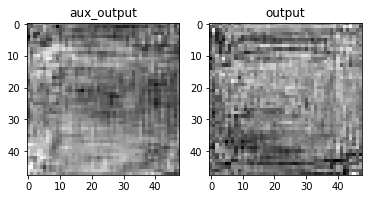

In [31]:
show_cnn_preds(cnns, 0)

#### SGD MSE ReLU

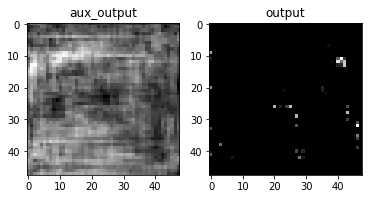

In [32]:
show_cnn_preds(cnns, 1)

#### SGD MSE Sigmoid

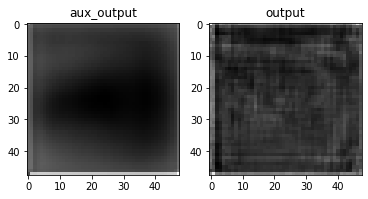

In [33]:
show_cnn_preds(cnns, 2)

#### SGD MAE TanH

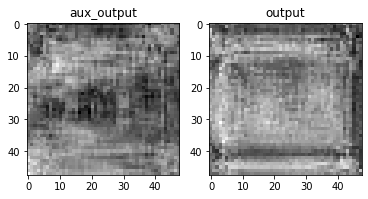

In [34]:
show_cnn_preds(cnns, 3)

#### SGD MAE ReLU

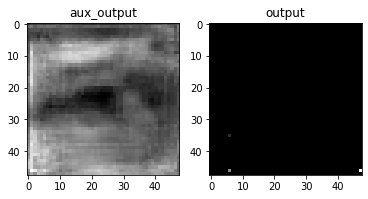

In [35]:
show_cnn_preds(cnns, 4)

#### SGD MAE Sigmoid

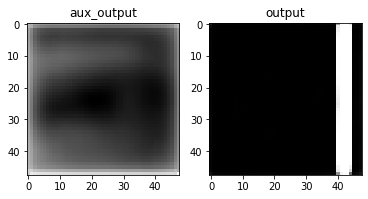

In [36]:
show_cnn_preds(cnns, 5)

#### Adam MSE TanH

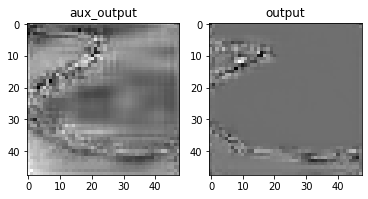

In [37]:
show_cnn_preds(cnns, 6)

#### Adam MSE ReLU

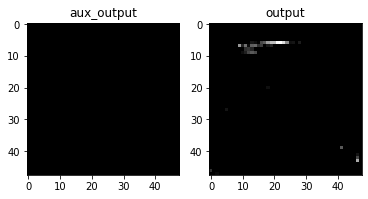

In [38]:
show_cnn_preds(cnns, 7)

#### Adam MSE Sigmoid

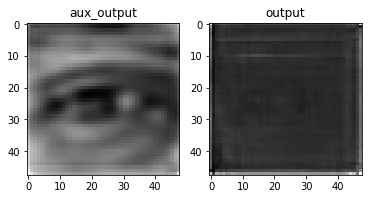

In [39]:
show_cnn_preds(cnns, 8)

#### Adam MAE TanH

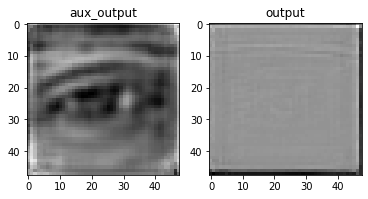

In [40]:
show_cnn_preds(cnns, 9)

#### Adam MAE ReLU

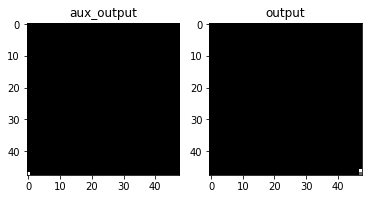

In [41]:
show_cnn_preds(cnns, 10)

#### Adam MAE Sigmoid

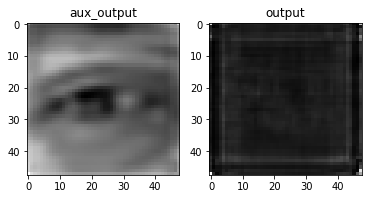

In [42]:
show_cnn_preds(cnns, 11)

#### Adamax MSE TanH

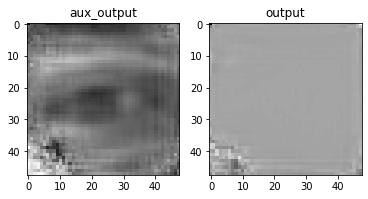

In [43]:
show_cnn_preds(cnns, 12)

#### Adamax MSE ReLU

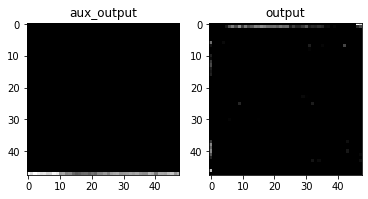

In [44]:
show_cnn_preds(cnns, 13)

#### Adamax MSE Sigmoid

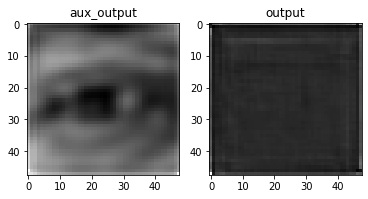

In [45]:
show_cnn_preds(cnns, 14)

#### Adamax MAE TanH

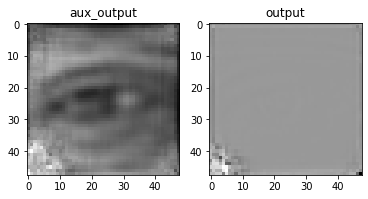

In [46]:
show_cnn_preds(cnns, 15)

#### Adamax MAE ReLU

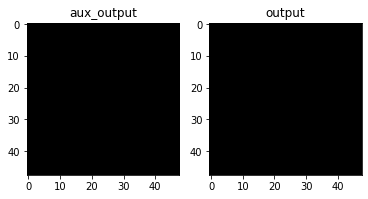

In [47]:
show_cnn_preds(cnns, 16)

#### Adamax MAE Sigmoid

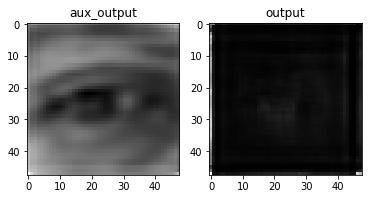

In [48]:
show_cnn_preds(cnns, 17)

#### RMSProp MSE TanH

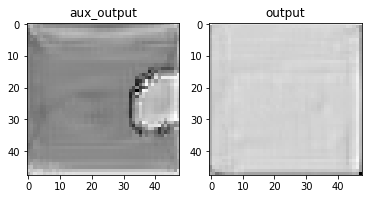

In [49]:
show_cnn_preds(cnns, 18)

#### RMSProp MSE ReLU

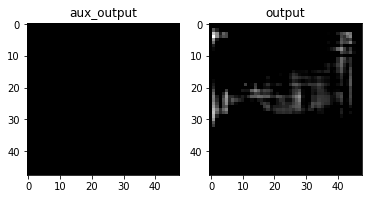

In [50]:
show_cnn_preds(cnns, 19)

#### RMSProp MSE Sigmoid (Best Combination)

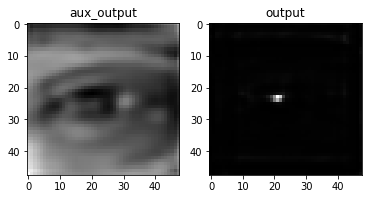

In [51]:
show_cnn_preds(cnns, 20)

#### RMSProp MAE TanH

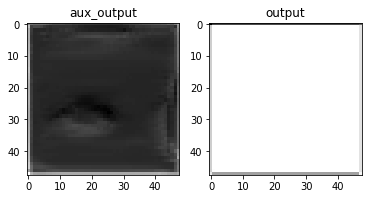

In [52]:
show_cnn_preds(cnns, 21)

#### RMSProp MAE ReLU

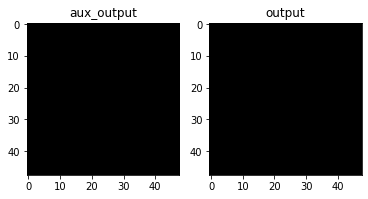

In [53]:
show_cnn_preds(cnns, 22)

#### RMSProp MAE Sigmoid

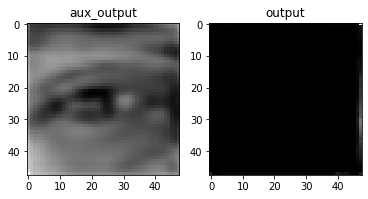

In [54]:
show_cnn_preds(cnns, 23)

### Vaidation Loss

In [61]:
# obtain the list of validation losses for each combination
losses = list()
for cnn_history in cnns_history:
    losses.append(cnn_history.history['val_loss'][-1])

<BarContainer object of 24 artists>

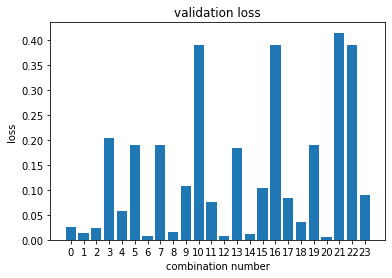

In [66]:
# visualize the list of validation losses
plt.xticks(range(24), range(24))
plt.title('validation loss')
plt.xlabel('combination number')
plt.ylabel('loss')
plt.bar(range(24), losses)

In [68]:
print('best combination:', np.argmin(losses))

best combination: 20


The best combination in terms of the validation loss and the visualized result is `optimizer='rmsprop'`, `loss='mse'`, `activation='sigmoid'`.

## Make a prediction for 10 test images. Draw predicted centers on them and visualize it. (You can draw iris center with cv2.circle())

In [93]:
# make predictions by the best model
preds = cnns[20].predict(X_test)

preds_aux = preds[0]
preds_main = preds[1]

In [116]:
# function for getting the coordinates of the maximum pixel
def get_max_pixel(image):
    return np.unravel_index(
        np.argmax(image),
        np.array(image).shape
    )[::-1]

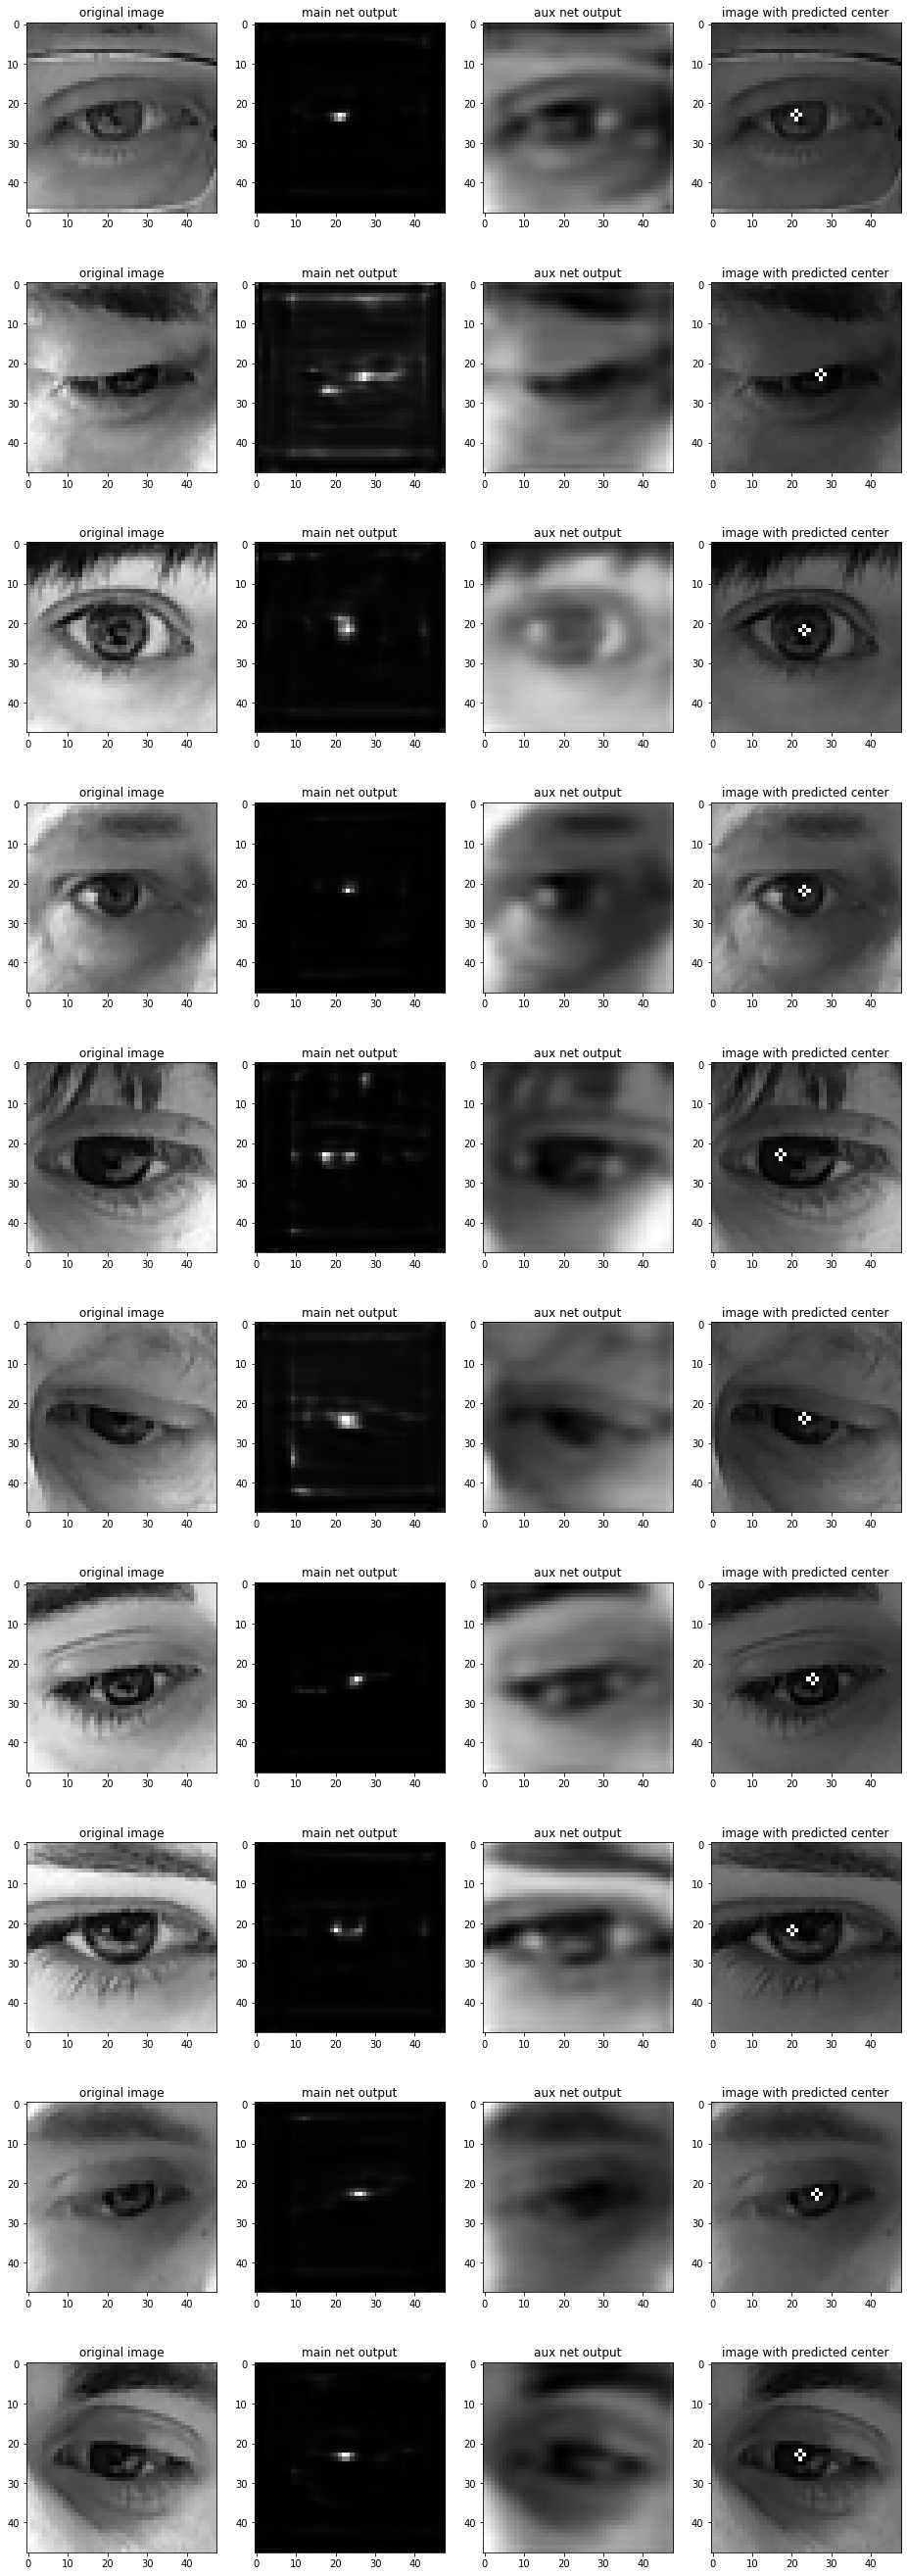

In [117]:
# visualization

n_images = 10
res = 48

plt.figure(figsize=(1/3*res,res))

for i in range(n_images):

    # retreive the predicted and original images
    current_main_pred = preds_main[i, :,:,0]
    image = X_test[i][:,:,0].copy() * 255
    current_aux_pred = preds_aux[i, :,:,0]

    # show original image
    ax = plt.subplot(n, 4, 4*i + 1)
    ax.set_title('original image')
    ax.imshow(image, cmap='gray')

    # show the predicted image from the main net
    ax = plt.subplot(n, 4, 4*i + 2)
    ax.set_title('main net output')
    ax.imshow(current_main_pred, cmap='gray')

    # show the predicted image from the aux net
    ax = plt.subplot(n, 4, 4*i + 3)
    ax.set_title('aux net output')
    ax.imshow(current_aux_pred, cmap='gray')

    # show the original image with overlayed predicted center 
    ax = plt.subplot(n, 4, 4*i + 4)
    ax.set_title('image with predicted center') 
    max_pixel_coords = get_max_pixel(current_main_pred) # get coords of max pixel
    cv2.circle(image, max_pixel_coords, radius=1, color=255) # make the circle around max_pixel_coords
    ax.imshow(image, cmap='gray')